# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [49]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

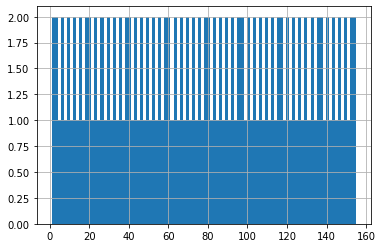

In [8]:
df['Positive affect'].hist(bins = 100)

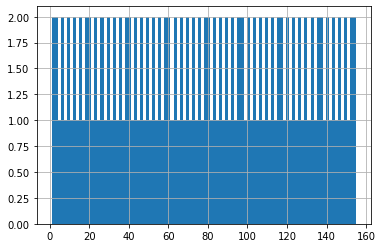

In [9]:
df.Freedom.hist(bins = 100)

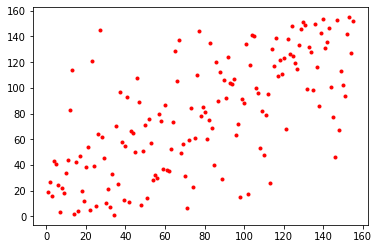

In [10]:
x= df.Freedom
y= df['Positive affect']
plt.plot(x, y, 'r.')
plt.show()

In [25]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [48]:

print(f'максимум:{df.Freedom.max()}\nминимум:{df.Freedom.min()}\nразмах:{df.Freedom.max()-df.Freedom.min()}\nмедиана\
:{df.Freedom.median()}')

максимум:155.0
минимум:1.0
размах:154.0
медиана:78.0


In [29]:
df.Ladder.value_counts().head() # нет моды

156    1
49     1
56     1
55     1
54     1
Name: Ladder, dtype: int64

In [28]:
statistics.pstdev(df.Ladder) #стандартное отклонение

45.032395746469746

In [30]:
statistics.pstdev(df.Ladder)**2 #дисперсия

2027.9166666666665

In [31]:
df.Freedom.isnull().sum()

1

In [ ]:
print('Медиана: ', statistics.median(df['duration']))

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [59]:
df = df.fillna(0) # без замены nan на 0 не работало

Коэффициент корреляции Пирсона: 0.6878506740844935


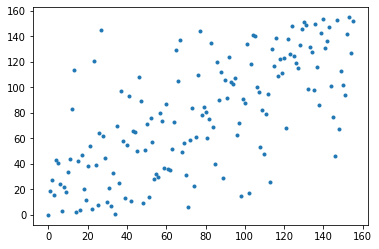

In [63]:
Freedom = df.Freedom
Positive_affect = df['Positive affect']
from scipy.stats import pearsonr
x = Freedom
y = Positive_affect
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [64]:
from sklearn import preprocessing
def norm_column(colums, min_,max_):
    colums = colums - statistics.mean(colums) # централизовали
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(min_,max_))
    duration_2 = min_max_scaler.fit_transform(np.array(colums).reshape(min_, max_)) # масштабировали
    return duration_2
norm_column(df.Freedom, -1,1)

array([[-0.93548387],
       [-0.92258065],
       [-0.96129032],
       [-0.90967742],
       [-0.75483871],
       [-0.85806452],
       [-0.87096774],
       [-0.89677419],
       [-0.88387097],
       [-0.66451613],
       [-0.78064516],
       [-0.79354839],
       [ 0.2       ],
       [-0.63870968],
       [-0.18709677],
       [-0.57419355],
       [-0.43225806],
       [-0.31612903],
       [-0.2       ],
       [-0.2516129 ],
       [-0.9483871 ],
       [-0.84516129],
       [-0.08387097],
       [-0.10967742],
       [ 0.31612903],
       [ 0.26451613],
       [-0.67741935],
       [-0.12258065],
       [-1.        ],
       [ 0.22580645],
       [-0.58709677],
       [ 0.08387097],
       [-0.61290323],
       [-0.74193548],
       [-0.04516129],
       [ 0.70322581],
       [-0.69032258],
       [ 0.39354839],
       [-0.34193548],
       [-0.32903226],
       [-0.98709677],
       [ 0.57419355],
       [-0.27741935],
       [-0.83225806],
       [-0.09677419],
       [-0

In [61]:
df.dtypes

Country (region)             object
Ladder                        int64
SD of Ladder                  int64
Positive affect             float64
Negative affect             float64
Social support              float64
Freedom                     float64
Corruption                  float64
Generosity                  float64
Log of GDP\nper capita      float64
Healthy life\nexpectancy    float64
dtype: object

Коэффициент корреляции Пирсона: 0.6878506740844935


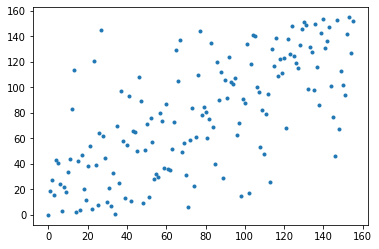

In [62]:
from scipy.stats import pearsonr
x = Freedom
y = Positive_affect

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Построить матрицу корреляций для всех колонок таблицы

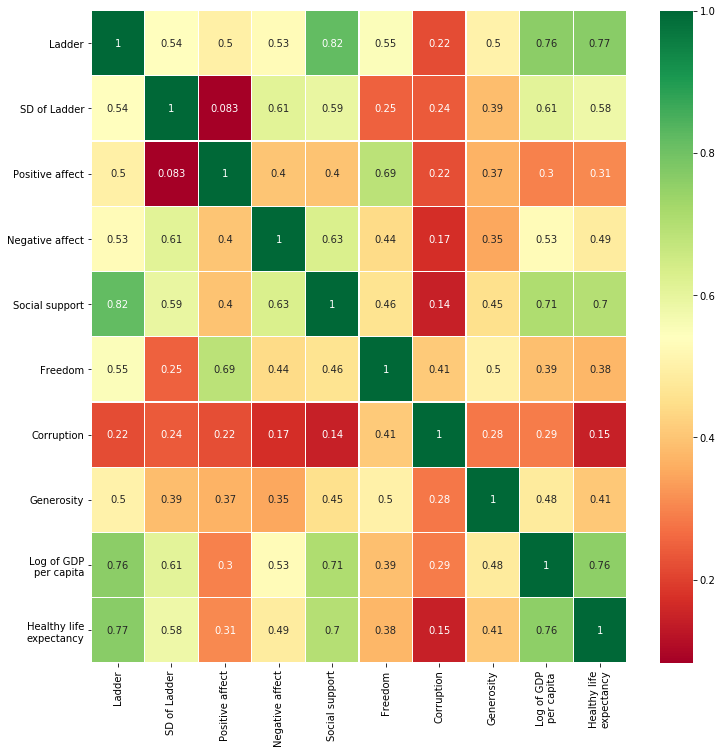

In [65]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [66]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

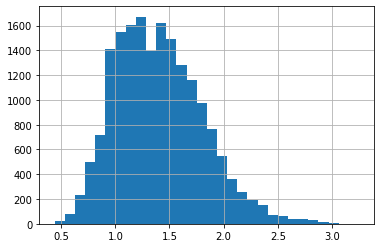

In [70]:
df.AveragePrice.hist(bins=30)

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Коэффициент корреляции Пирсона: -0.2083170484878854


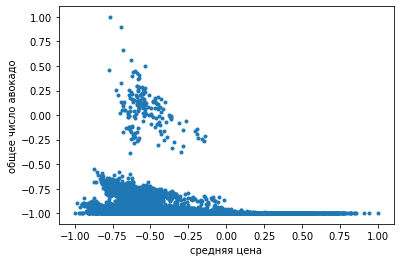

In [92]:
t = pd.DataFrame(norm_column(df.AveragePrice,-1,1))
t[1]= pd.DataFrame(norm_column(df['4046'],-1,1))
from scipy.stats import pearsonr
x = t[0]
y = t[1]
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
plt.xlabel('средняя цена')
plt.ylabel('общее число авокадо')
print('Коэффициент корреляции Пирсона:', corr)